# KASDD TK | a
Siapa tim yang paling banyak memenangkan pertandingan grand final dari sebuah Event

In [102]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install pandas numpy seaborn scipy plotly matplotlib   

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
REFERENCE = [
    'https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy',
    
    ]

In [104]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import scipy.stats as scp
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [105]:
# mencari jumlah nilai unik pada kolom yang bertipe kategorik
def check_uniqueness(df):
    for col in df.select_dtypes(include=object).columns:
        print('No. of unique values in column '+col+':')
        print(df[col].value_counts(),'\n')
        
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

# mengecek nilai duplikat
def check_duplicates(df):
    dup = df.duplicated()
    print("Jumlah duplikasi data : " + str(dup.sum()))

# mengecek keberadaan outlier (harus numerik)
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())
    
    print("Persentase outlier terhadap data per kolom")
    for col in outliers.keys():
        percentage = outliers[col] / len(df)
        print(col)
        print(percentage)
        print()

    return outliers

# Cek nilai outlier & mengembalikan list nama kolom dengan outlier
def outlier_col(dict, total_data):
    outlier_col = []

    print("Persentase outlier terhadap data per kolom")
    for col in dict.keys():
        percentage = dic[col] / total_data
        if 0 < percentage < 1:
            outlier_col.append(col)
    return outlier_col

def drop_outlier(col_to_check, df):
    Q1 = df[col_to_check].quantile(0.25)
    Q3 = df[col_to_check].quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    mask = (df[col_to_check] >= lower_limit) & (df[col_to_check] <= upper_limit)
    new_df = df[mask]
    return new_df

In [106]:
# Import dataset
games = pd.read_csv('games.csv')
matches = pd.read_csv('matches.csv')

## Pre-processing

### games.csv

In [107]:
games.columns

Index(['No', 'GameID', 'MatchID', 'Map', 'Team1ID', 'Team2ID', 'Team1',
       'Team2', 'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy',
       'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco',
       'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds'],
      dtype='object')

In [108]:
# check null
check_null(games)
games = games.dropna()
print()
check_null(games)


               Total   Percent
Team2_FullBuy   1034  0.079778
Team1_SemiEco   1034  0.079778
Team1_SemiBuy   1034  0.079778
Team1_FullBuy   1034  0.079778
Team2_Eco       1034  0.079778
Team2_SemiEco   1034  0.079778
Team2_SemiBuy   1034  0.079778
Team1_Eco       1034  0.079778

Tidak ditemukan missing value pada dataset


In [109]:
# check duplicate
check_duplicates(games)

Jumlah duplikasi data : 0


In [110]:
mask = ['GameID', 'MatchID', 'Map']
games = games[mask]
games.columns

Index(['GameID', 'MatchID', 'Map'], dtype='object')

### matches.csv

In [ ]:
matches.columns

Index(['No', 'MatchID', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage',
       'Team1ID', 'Team2ID', 'Team1', 'Team2', 'Team1_MapScore',
       'Team2_MapScore'],
      dtype='object')

In [ ]:
# check null
check_null(matches)
matches = matches.dropna()
print()
check_null(matches)

       Total   Percent
Patch    411  0.064209

Tidak ditemukan missing value pada dataset


In [ ]:
# check duplicate
check_duplicates(matches)

Jumlah duplikasi data : 0


In [ ]:
matches.columns

Index(['No', 'MatchID', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage',
       'Team1ID', 'Team2ID', 'Team1', 'Team2', 'Team1_MapScore',
       'Team2_MapScore'],
      dtype='object')

In [ ]:
mask2 = ['MatchID', 'Patch', 'EventID', 'EventName', 'EventStage']
matches = matches[mask2]
matches.columns

Index(['MatchID', 'Patch', 'EventID', 'EventName', 'EventStage'], dtype='object')

## Analyzing

In [116]:
matches['Patch'].value_counts()

Patch
Patch 1.12Minor updates to observing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         485
Patch 3.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
dfTour = games.merge(matches, left_on='MatchID', right_on='MatchID')
dfTour.columns

Index(['GameID', 'MatchID', 'Map', 'Patch', 'EventID', 'EventName',
       'EventStage'],
      dtype='object')

In [ ]:
dfTour['Patch'] = dfTour['Patch'].str.extract(r'(\d)\.\d+').astype(float)
dfTour

,GameID,MatchID,Map,Patch,EventID,EventName,EventStage
0,60894,62393,Breeze,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A)
1,60895,62393,Bind,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A)
2,60896,62393,Haven,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A)
3,60924,62403,Icebox,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (C)
4,60925,62403,Haven,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (C)
...,...,...,...,...,...,...,...
11342,2297,1490,Haven,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 32
11343,2244,1454,Haven,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 32
11344,2302,1496,Split,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 64
11345,2278,1471,Bind,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128


In [115]:
dfTour['Patch'].value_counts()

Patch
3.0    4339
2.0    4238
1.0    2770
Name: count, dtype: int64

In [ ]:
tour_patch0 = dfTour[dfTour['Patch'] == 0.0]
tour_patch1 = dfTour[dfTour['Patch'] == 1.0]
tour_patch2 = dfTour[dfTour['Patch'] == 2.0]
tour_patch3 = dfTour[dfTour['Patch'] == 3.0]

tour_patch_list = [tour_patch0, tour_patch1, tour_patch2, tour_patch3]

In [ ]:
tour_patch0

,GameID,MatchID,Map,Patch,EventID,EventName,EventStage


In [ ]:
map_played_counts = dfTour['Map'].value_counts()

C:\Users\vinse\AppData\Local\Temp\ipykernel_18648\819596392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tour_patch_list[i], x='Map', order=map_played_counts.index, palette='magma').set_ylim(0, 3000)
C:\Users\vinse\AppData\Local\Temp\ipykernel_18648\819596392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tour_patch_list[i], x='Map', order=map_played_counts.index, palette='magma').set_ylim(0, 3000)
C:\Users\vinse\AppData\Local\Temp\ipykernel_18648\819596392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=

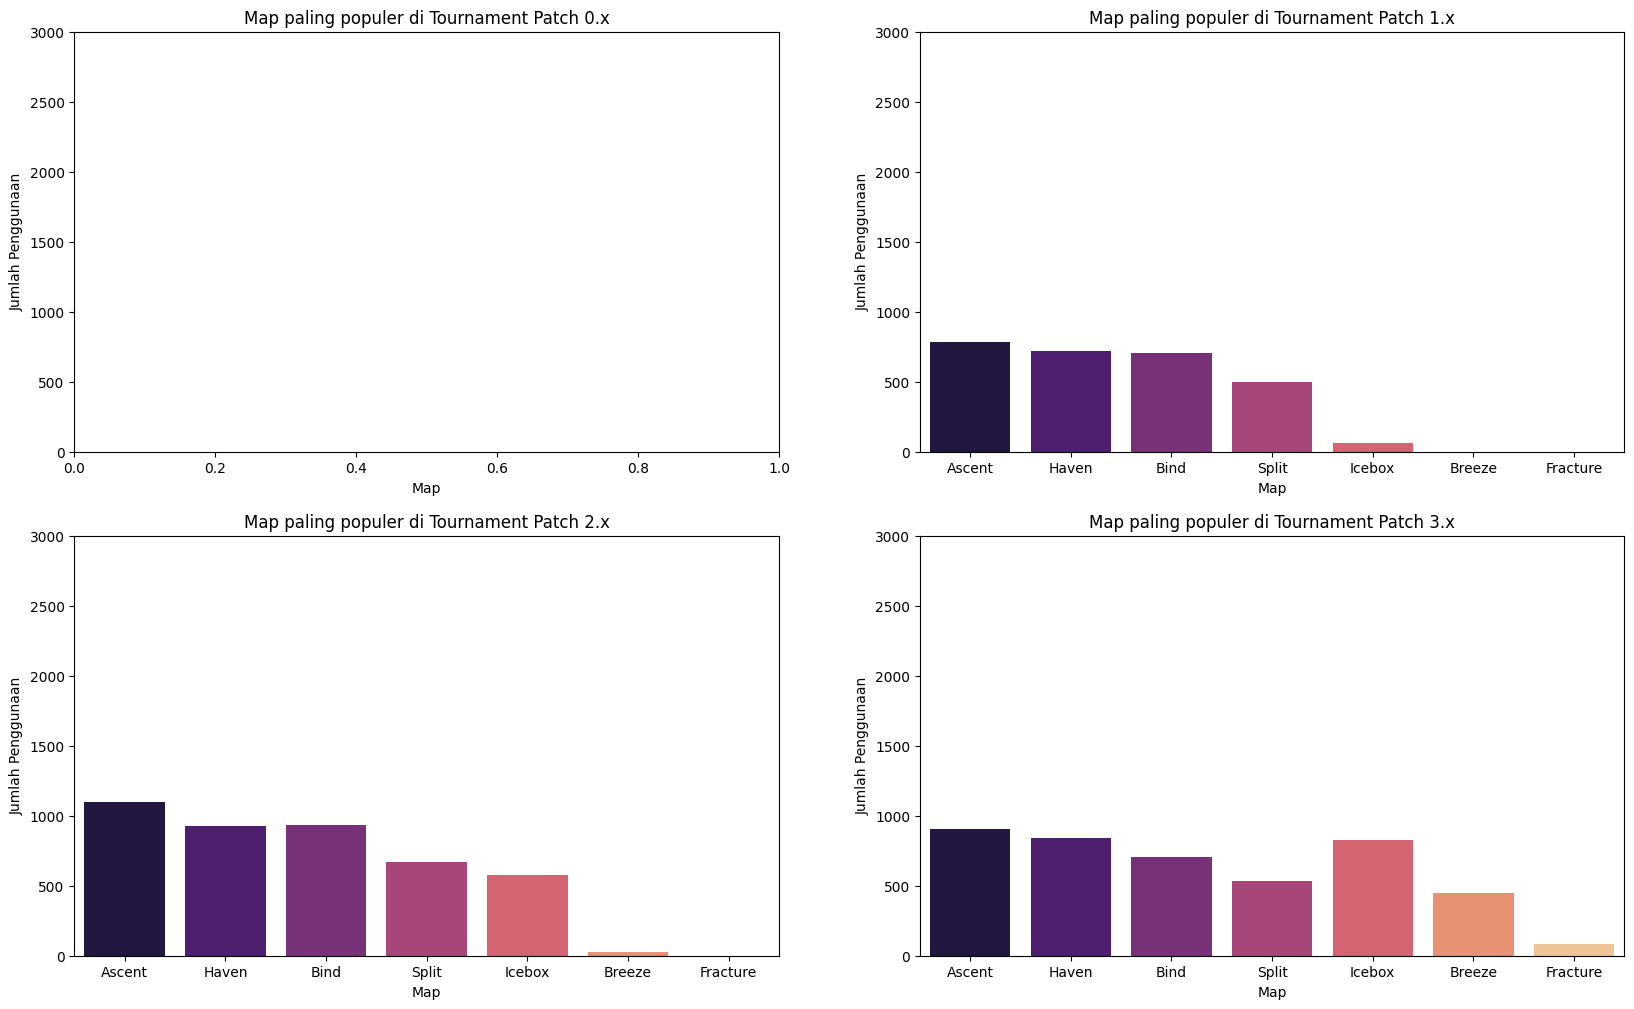

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=tour_patch_list[i], x='Map', order=map_played_counts.index, palette='magma').set_ylim(0, 3000)
    plt.title(f'Map paling populer di Tournament Patch {i}.x')
    plt.xlabel('Map')
    plt.ylabel('Jumlah Penggunaan')

plt.show()

C:\Users\vinse\AppData\Local\Temp\ipykernel_18648\3465890991.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(dfTour, x='Map', order=map_played_counts.index, palette='magma').set_ylim(0,4000)


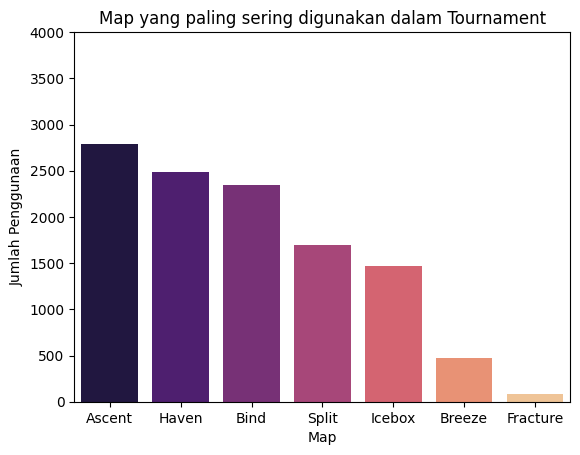

In [ ]:
sns.countplot(dfTour, x='Map', order=map_played_counts.index, palette='magma').set_ylim(0,4000)
plt.title('Map yang paling sering digunakan dalam Tournament')
plt.xlabel('Map')
plt.ylabel('Jumlah Penggunaan')
plt.show()

In [ ]:
print("Berdasarkan dataset tersebut, Map yang paling sering digunakan dalam tournament Valorant adalah", map_played_counts.index[0])
print("Dengan jumlah game yang dimainkan di map tersebut sebanyak", map_played_counts.values[0])

Berdasarkan dataset tersebut, Map yang paling sering digunakan dalam tournament Valorant adalah Ascent
Dengan jumlah game yang dimainkan di map tersebut sebanyak 2790
